# CIS 469L Project
## Name: Olivia Hinson
## Date: 10/6/2020

## Answer 3 Research Questions:
+ <font color = 'red'>**Can a pivot table be used to predict the number of males and females onboard the Titanic?**</font>
+ <font color = 'red'>**Can statistical analysis be performed to explain some parts of the data?**</font>
+ <font color = 'red'>**Can you scan the file to list only survivors of the Titanic with the passenger name?**</font>

In [40]:
# Import libraries to use 
import numpy as np
import pandas as pd
from scipy import stats
import scipy.stats.distributions as dist
# Import visualization libraries to use
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Store csv file in variable
titanic_data = r'<path to file>\titanic.csv'

# Read csv file in dataframe
titanic_df = pd.read_csv(titanic_data)

# Print dataframe to confirm successful loading
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# Remove any null values in rows
titanic = titanic_df.dropna()

# Print new dataframe with removed null values
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


## Pivot Table

Create <b>pivot table</b> of male and female passengers to predict number of males and females onboard the Titanic based on "Embarked" column

In [4]:
# Create pivot table
pivot_titanic = titanic.pivot_table('Survived', index = 'Sex', columns = 'Embarked', aggfunc = np.size)
# Add 'Total' column to add all female and male passengers onbard Titanic
pivot_titanic['Total'] = pivot_titanic['C'] + pivot_titanic['Q'] + pivot_titanic['S']

# Print Pivot table
pivot_titanic

Embarked,C,Q,S,Total
Sex,,,,
female,34,1,53,88
male,31,1,63,95


Create Visualization for Pivot Table<br />
<font color = 'red'>**Bar plot**</font>

Text(0.5, 1.0, 'Passengers Embarked by Male and Female')

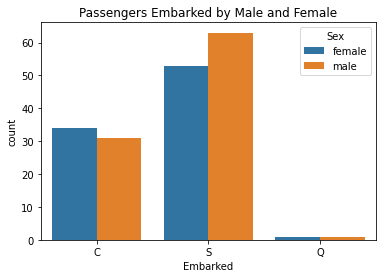

In [22]:
# Count plot(a.k.a Bar plot)
sns.countplot(x = 'Embarked', data = titanic, hue = 'Sex')
plt.title('Passengers Embarked by Male and Female')

## Statistical Analysis

In [5]:
# Use 'groupby' to group by Sex
grouped = titanic.groupby('Sex')

# Store data to analyze in variables
Age = grouped['Age']
Fare = grouped['Fare']

Calculate <b>Measures of Central Tendency</b> for male and female passengers: Mean, Median, Mode
+ **Mean**: Sum of numbers divided by number of data values observed
+ **Median**: Middle value in an ordered set of data
+ **Mode**: Number most frequent in data set

In [6]:
# Calculate mean, median, and mode of Age and Fare columns grouped by Male and Female
age = Age.agg([np.mean, np.median, stats.mode])
fare = Fare.agg([np.mean, np.median, stats.mode])

# Print results
print('Age:\n', age)
print()
print('Fare:\n', fare)

Age:
              mean  median           mode
Sex                                     
female  32.676136   32.25  ([24.0], [7])
male    38.451789   37.00  ([36.0], [7])

Fare:
              mean   median            mode
Sex                                       
female  89.000900  77.9583   ([10.5], [4])
male    69.124343  51.8625  ([26.55], [6])


Calculate <b>Measures of Variation</b> for male and female passengers: Variance and Standard Deviation
+ **Variance**: Measures how varied values of data are from each other
+ **Standard Deviation**: Measures how each entry deviates from mean

In [7]:
# Calculate variance and standard deviation for Male and Female
age = Age.agg([np.var, np.std])
fare = Fare.agg([np.var, np.std])

# Print results
print('Age:\n', age)
print()
print('Fare:\n', fare)

Age:
                var        std
Sex                          
female  202.793332  14.240552
male    269.936549  16.429746

Fare:
                 var        std
Sex                           
female  4541.742943  67.392455
male    6890.391018  83.008379


Calculate <b>Confidence Intervals</b> for male and female passengers
+ **Confidence Intervals**: Range of values used to estimate population parameter

In [8]:
# Calculate confidence intervals for Age column
# State level of confidence for 95% z critical value
z_95 = 1.96

mean = Age.agg(np.mean)
std = Age.agg(np.std)
n = Age.agg(np.size)

# Calculate 99% Confidence Level
c_95 = z_95 * (std / n)

# Calcualte confidence interval
c_int_95_low = mean - c_95
c_int_95_high = mean + c_95

# Print confidence results as DataFrame
c_95 = pd.DataFrame(c_95)
c_int_95_low = pd.DataFrame(c_int_95_low)
c_int_95_high = pd.DataFrame(c_int_95_high)

# Print results
print('Calculated confidence: ')
print(c_95)
print()
print('Confidence Interval:')
print('(Low)\n', c_int_95_low)
print('(High)\n', c_int_95_high)
print()
print('Population mean:')
print(mean)

Calculated confidence: 
             Age
Sex             
female  0.317176
male    0.338972

Confidence Interval:
(Low)
               Age
Sex              
female  32.358960
male    38.112818
(High)
               Age
Sex              
female  32.993312
male    38.790761

Population mean:
Sex
female    32.676136
male      38.451789
Name: Age, dtype: float64


In [9]:
# Calculate confidence intervals for Fare column
# State level of confidence for 95% z critical value
z_95 = 1.96

mean = Fare.agg(np.mean)
std = Fare.agg(np.std)
n = Fare.agg(np.size)

# Calculate 99% Confidence Level
c_95 = z_95 * (std / n)

# Calcualte confidence interval
c_int_95_low = mean - c_95
c_int_95_high = mean + c_95

# Print confidence results as DataFrame
c_95 = pd.DataFrame(c_95)
c_int_95_low = pd.DataFrame(c_int_95_low)
c_int_95_high = pd.DataFrame(c_int_95_high)

# Print results
print('Calculated confidence: ')
print(c_95)
print()
print('Confidence Interval:')
print('(Low)\n', c_int_95_low)
print('(High)\n', c_int_95_high)
print()
print('Population mean:')
print(mean)

Calculated confidence: 
            Fare
Sex             
female  1.501014
male    1.712594

Confidence Interval:
(Low)
              Fare
Sex              
female  87.499886
male    67.411749
(High)
              Fare
Sex              
female  90.501914
male    70.836937

Population mean:
Sex
female    89.000900
male      69.124343
Name: Fare, dtype: float64


Perform <b>Hypthesis Testing</b>
+ **H0** (Null Hypothesis): The Titanic dataset states that the proportion of passengers (both male and female) that survived is at least 34%. (**Claim**)
+ **Ha** (Alternative Hypothesis): The Titanic dataset states that the proportion of passengers (both male and female) that survivied is less than 34%. 

In [10]:
# Read data into variable
data = pd.read_csv(titanic_data)

# Encode values
data['Survived'] = data['Survived'].map({1:'Survived',0:'Not Survived'})
# Drop nan values
data = data.dropna()

# Create contingency table
contingency_table = pd.crosstab(data.Survived,data.Sex) 
# Print table
contingency_table

Sex,female,male
Survived,,
Not Survived,6,54
Survived,82,41


Create Visualization for Contingency Table<br />
<font color = 'red'>**Bar plot**</font>

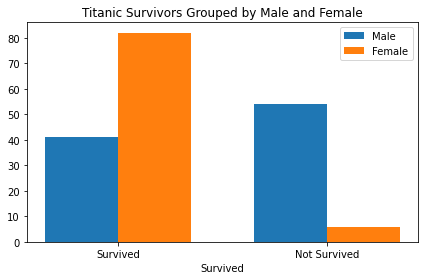

In [48]:
# Create data for table
labels = ['Survived', 'Not Survived']
male = [41, 54]
female = [82, 6]

# The label positions
x = np.arange(len(labels))
# Specify width of bars
width = 0.35 

# Create bar plot
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, male, width, label='Male')
rects2 = ax.bar(x + width/2, female, width, label='Female')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Titanic Survivors Grouped by Male and Female')
ax.set_xlabel('Survived')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

In [11]:
# Convert numbers in contingency table to proportions
pd.crosstab(data.Survived, data.Sex).apply(lambda r: r/r.sum(), axis = 0)

Sex,female,male
Survived,,
Not Survived,0.068182,0.568421
Survived,0.931818,0.431579


In [12]:
# Calcualte proportion that survived for both male and female
total_proportion_survived = (data.Survived == "Survived").mean()

# Total number of male and female 
num_female = data[data.Sex=="female"].shape[0]
num_male = data[data.Sex=="male"].shape[0]

# Ensure sample size is large enough, i.e. at least 10 survivors and 10 casualities in each category
# Use 'assert' for exception handling
assert num_female*total_proportion_survived>10, "Assumptions not met"
assert num_male*total_proportion_survived>10, "Assumptions not met"
assert num_female*(1-total_proportion_survived)>10, "Assumptions not met"
assert num_male*(1-total_proportion_survived)>10, "Assumptions not met"

In [13]:
#This table helps us to calculate the SE.
prop = data.groupby("Sex")["Survived"].agg([lambda z: np.mean(z=="Survived"), "size"])
prop.columns = ['proportions_survived','total_counts']
prop.head()

,proportions_survived,total_counts
Sex,,
female,0.931818,88
male,0.431579,95


In [14]:
#Calculating standard error
variance = total_proportion_survived * (1 - total_proportion_survived)
standard_error = np.sqrt(variance * (1 / prop.total_counts.female + 1 / prop.total_counts.male))
print("Sample Standard Error",standard_error)

Sample Standard Error 0.06945435736849903


In [15]:
# Calculate the test statistic 
best_estimate = (prop.proportions_survived.female - prop.proportions_survived.male)
print("The best estimate is",best_estimate)
hypothesized_estimate = 0.34
test_stat = (best_estimate-hypothesized_estimate) / standard_error
print("Computed Test Statistic is",test_stat)

The best estimate is 0.5002392344497607
Computed Test Statistic is 2.3071156443013474


In [16]:
# Calculate the  p-value
# One-tailed test 
pvalue = dist.norm.cdf(-np.abs(test_stat)) 
print("Computed P-value is", pvalue)

Computed P-value is 0.010524187021433172


## Listing Survivors

Print list of survivors in Titanic data with each passenger name beside them

In [17]:
# Store columns in variable as list
survived = titanic['Survived'].tolist()
name = titanic['Name'].tolist()

In [18]:
print('Survived' + '\t\t' + 'Name')
# Loop through each to print survivors of Titanic
for i, e in enumerate(survived):
    # If survived equals 1
    if(e == 1):
        print(str(e) + '\t\t' + name[i])

Survived		Name
1		Cumings, Mrs. John Bradley (Florence Briggs Thayer)
1		Futrelle, Mrs. Jacques Heath (Lily May Peel)
1		Sandstrom, Miss. Marguerite Rut
1		Bonnell, Miss. Elizabeth
1		Beesley, Mr. Lawrence
1		Sloper, Mr. William Thompson
1		Harper, Mrs. Henry Sleeper (Myna Haxtun)
1		Nye, Mrs. (Elizabeth Ramell)
1		Fortune, Miss. Mabel Helen
1		Greenfield, Mr. William Bertram
1		Webber, Miss. Susan
1		Newsom, Miss. Helen Monypeny
1		Pears, Mrs. Thomas (Edith Wearne)
1		Becker, Master. Richard F
1		Navratil, Master. Michel M
1		Brown, Mrs. James Joseph (Margaret Tobin)
1		Lurette, Miss. Elise
1		Blank, Mr. Henry
1		Newell, Miss. Madeleine
1		Bazzani, Miss. Albina
1		Hoyt, Mr. Frederick Maxfield
1		Harris, Mrs. Henry Birkhardt (Irene Wallach)
1		Beckwith, Mr. Richard Leonard
1		Cherry, Miss. Gladys
1		Graham, Mrs. William Thompson (Edith Junkins)
1		Bissette, Miss. Amelia
1		Andrews, Miss. Kornelia Theodosia
1		Bishop, Mrs. Dickinson H (Helen Walton)
1		Baxter, Mrs. James (Helene DeLaude